# Classifier Evaluation for Main dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_logreg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled), multi_class='ovr')

# Display Logistic Regression results
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Logistic Regression Performance:
Accuracy: 0.8276323492514844
Precision: 0.826454042882292
Recall: 0.8276323492514844
F1 Score: 0.8265426866915024
Confusion Matrix:
 [[2039  100  492  475]
 [  51  405   24  216]
 [ 587    3 9188  930]
 [ 306   28  910 8160]]
ROC AUC Score: 0.9498031079409708


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled), multi_class='ovr')

# Display Decision Tree results
print("Decision Tree Performance:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("ROC AUC Score:", roc_auc_tree)


Decision Tree Performance:
Accuracy: 0.9196286693986786
Precision: 0.9200772552971925
Recall: 0.9196286693986786
F1 Score: 0.9198384006461082
Confusion Matrix:
 [[ 2699   167   154    86]
 [  146   491    10    49]
 [  165    19 10039   485]
 [  115    54   472  8763]]
ROC AUC Score: 0.9152606434545683


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Handle ROC AUC for multiclass or binary classification
if len(y.unique()) == 2:
    # For binary classification, calculate ROC AUC
    roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
else:
    # For multiclass classification, use One-vs-Rest strategy
    y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc_knn = roc_auc_score(y_test_binarized, knn.predict_proba(X_test_scaled), average="macro", multi_class="ovr")

# Print the results
print("k-NN Classifier Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


k-NN Classifier Performance:
Accuracy: 0.916366981684369
Precision: 0.9159589303467297
Recall: 0.916366981684369
F1 Score: 0.9154355062164903
Confusion Matrix:
 [[ 2701    94   220    91]
 [  181   419     6    90]
 [  132     3 10242   331]
 [   96    12   744  8552]]
ROC AUC Score: 0.9615329587658364


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')  # 'weighted' for multi-class
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')  # 'weighted' for multi-class
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')  # 'weighted' for multi-class
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# For multi-class ROC AUC, use One-vs-Rest (OvR)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_prob = random_forest.predict_proba(X_test_scaled)  # Get class probabilities
roc_auc_forest = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')  # OvR for multi-class

# Display Random Forest results
print("Random Forest Performance:")
print("Accuracy:", accuracy_forest)
print("Precision (weighted):", precision_forest)
print("Recall (weighted):", recall_forest)
print("F1 Score (weighted):", f1_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("ROC AUC Score (One-vs-Rest):", roc_auc_forest)


Random Forest Performance:
Accuracy: 0.951032867776198
Precision (weighted): 0.9508421819964897
Recall (weighted): 0.951032867776198
F1 Score (weighted): 0.9506411434150406
Confusion Matrix:
 [[ 2852    95   111    48]
 [  133   509     3    51]
 [   42     1 10495   170]
 [   41     5   471  8887]]
ROC AUC Score (One-vs-Rest): 0.9930713625986858


# Classifier evaluation for Dataset 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_1.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = pipeline.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_logreg = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

# Display Logistic Regression results
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Logistic Regression Performance:
Accuracy: 0.7663612565445026
Precision: 0.7632242640049225
Recall: 0.7663612565445026
F1 Score: 0.7539992212052072
Confusion Matrix:
 [[2173    0  746  770]
 [ 217  101  150  619]
 [ 741    2 8948 1343]
 [ 359   42 1080 8685]]
ROC AUC Score: 0.8870775626441114


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_1.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')

# Display Decision Tree results
print("Decision Tree Performance:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("ROC AUC Score:", roc_auc_tree)


Decision Tree Performance:
Accuracy: 0.8937480751462888
Precision: 0.8915345766554915
Recall: 0.8937480751462888
F1 Score: 0.891512917305274
Confusion Matrix:
 [[ 3221    53   206   209]
 [  176   512    20   379]
 [  302     6 10348   378]
 [  208   153   670  9135]]
ROC AUC Score: 0.9733977746492022


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_1.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Handle ROC AUC for multiclass or binary classification
if len(y.unique()) == 2:
    # For binary classification, calculate ROC AUC
    roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
else:
    # For multiclass classification, use One-vs-Rest strategy
    y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc_knn = roc_auc_score(y_test_binarized, knn.predict_proba(X_test_scaled), average="macro", multi_class="ovr")

# Print the results
print("k-NN Classifier Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


k-NN Classifier Performance:
Accuracy: 0.8719202340622113
Precision: 0.8699787136138671
Recall: 0.8719202340622113
F1 Score: 0.8703424417835681
Confusion Matrix:
 [[3061  119  314  195]
 [ 148  524   17  398]
 [ 373    8 9945  708]
 [ 234  157  656 9119]]
ROC AUC Score: 0.9457621243566843


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# For multi-class ROC AUC, use One-vs-Rest (OvR)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_prob = random_forest.predict_proba(X_test_scaled)  # Get class probabilities
roc_auc_forest = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')  # OvR for multi-class

# Display Random Forest results
print("Random Forest Performance:")
print("Accuracy:", accuracy_forest)
print("Precision (weighted):", precision_forest)
print("Recall (weighted):", recall_forest)
print("F1 Score (weighted):", f1_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("ROC AUC Score (One-vs-Rest):", roc_auc_forest)


Random Forest Performance:
Accuracy: 0.8939405605174007
Precision (weighted): 0.8916436853388839
Recall (weighted): 0.8939405605174007
F1 Score (weighted): 0.8916840760029543
Confusion Matrix:
 [[ 3216    54   212   207]
 [  173   511    22   381]
 [  297     6 10344   387]
 [  205   153   658  9150]]
ROC AUC Score (One-vs-Rest): 0.9762073285475737


# Classifier evaluation for Dataset 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_2.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = pipeline.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_logreg = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

# Display Logistic Regression results
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Logistic Regression Performance:
Accuracy: 0.7944641207268247
Precision: 0.7917142700008563
Recall: 0.7944641207268247
F1 Score: 0.7913084217440788
Confusion Matrix:
 [[2523   93  524  549]
 [ 317  376   52  342]
 [ 621   42 9176 1195]
 [ 332  100 1172 8562]]
ROC AUC Score: 0.9209946840535282


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_2.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')

# Display Decision Tree results
print("Decision Tree Performance:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("ROC AUC Score:", roc_auc_tree)


Decision Tree Performance:
Accuracy: 0.8893594086849399
Precision: 0.8896168100129127
Recall: 0.8893594086849399
F1 Score: 0.8894747735640243
Confusion Matrix:
 [[ 3047   184   311   147]
 [  205   754    21   107]
 [  340    28 10040   626]
 [  170   117   618  9261]]
ROC AUC Score: 0.8970119420157732


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_1.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Handle ROC AUC for multiclass or binary classification
if len(y.unique()) == 2:
    # For binary classification, calculate ROC AUC
    roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
else:
    # For multiclass classification, use One-vs-Rest strategy
    y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc_knn = roc_auc_score(y_test_binarized, knn.predict_proba(X_test_scaled), average="macro", multi_class="ovr")

# Print the results
print("k-NN Classifier Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


k-NN Classifier Performance:
Accuracy: 0.8719202340622113
Precision: 0.8699787136138671
Recall: 0.8719202340622113
F1 Score: 0.8703424417835681
Confusion Matrix:
 [[3061  119  314  195]
 [ 148  524   17  398]
 [ 373    8 9945  708]
 [ 234  157  656 9119]]
ROC AUC Score: 0.9457621243566843


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# For multi-class ROC AUC, use One-vs-Rest (OvR)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_prob = random_forest.predict_proba(X_test_scaled)  # Get class probabilities
roc_auc_forest = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')  # OvR for multi-class

# Display Random Forest results
print("Random Forest Performance:")
print("Accuracy:", accuracy_forest)
print("Precision (weighted):", precision_forest)
print("Recall (weighted):", recall_forest)
print("F1 Score (weighted):", f1_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("ROC AUC Score (One-vs-Rest):", roc_auc_forest)


Random Forest Performance:
Accuracy: 0.8939405605174007
Precision (weighted): 0.8916436853388839
Recall (weighted): 0.8939405605174007
F1 Score (weighted): 0.8916840760029543
Confusion Matrix:
 [[ 3216    54   212   207]
 [  173   511    22   381]
 [  297     6 10344   387]
 [  205   153   658  9150]]
ROC AUC Score (One-vs-Rest): 0.9762073285475737


# Classifier evaluation for Dataset 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_3.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = pipeline.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_logreg = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

# Display Logistic Regression results
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Logistic Regression Performance:
Accuracy: 0.8010856174930705
Precision: 0.798327694127967
Recall: 0.8010856174930705
F1 Score: 0.7984054507030378
Confusion Matrix:
 [[2518  128  480  563]
 [ 294  420   41  332]
 [ 595   20 9341 1078]
 [ 328  100 1208 8530]]
ROC AUC Score: 0.9273383055043412


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_3.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')

# Display Decision Tree results
print("Decision Tree Performance:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("ROC AUC Score:", roc_auc_tree)


Decision Tree Performance:
Accuracy: 0.900408068986757
Precision: 0.9002334946022187
Recall: 0.900408068986757
F1 Score: 0.9003060161707382
Confusion Matrix:
 [[ 3041   189   289   170]
 [  193   774    13   107]
 [  272    20 10164   578]
 [  140    97   519  9410]]
ROC AUC Score: 0.9043394352432289


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/Dataset_1.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Handle ROC AUC for multiclass or binary classification
if len(y.unique()) == 2:
    # For binary classification, calculate ROC AUC
    roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
else:
    # For multiclass classification, use One-vs-Rest strategy
    y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc_knn = roc_auc_score(y_test_binarized, knn.predict_proba(X_test_scaled), average="macro", multi_class="ovr")

# Print the results
print("k-NN Classifier Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


k-NN Classifier Performance:
Accuracy: 0.8719202340622113
Precision: 0.8699787136138671
Recall: 0.8719202340622113
F1 Score: 0.8703424417835681
Confusion Matrix:
 [[3061  119  314  195]
 [ 148  524   17  398]
 [ 373    8 9945  708]
 [ 234  157  656 9119]]
ROC AUC Score: 0.9457621243566843


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# For multi-class ROC AUC, use One-vs-Rest (OvR)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_prob = random_forest.predict_proba(X_test_scaled)  # Get class probabilities
roc_auc_forest = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')  # OvR for multi-class

# Display Random Forest results
print("Random Forest Performance:")
print("Accuracy:", accuracy_forest)
print("Precision (weighted):", precision_forest)
print("Recall (weighted):", recall_forest)
print("F1 Score (weighted):", f1_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("ROC AUC Score (One-vs-Rest):", roc_auc_forest)


Random Forest Performance:
Accuracy: 0.8939405605174007
Precision (weighted): 0.8916436853388839
Recall (weighted): 0.8939405605174007
F1 Score (weighted): 0.8916840760029543
Confusion Matrix:
 [[ 3216    54   212   207]
 [  173   511    22   381]
 [  297     6 10344   387]
 [  205   153   658  9150]]
ROC AUC Score (One-vs-Rest): 0.9762073285475737


## Cross validation

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Split data into training and testing sets (optional here but keeps dataset ready for train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with scaling where required
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-Validation Evaluation
print("Cross-Validation Results (5-fold):\n")

for model_name, model in models.items():
    print(f"Evaluating {model_name} with Cross-Validation...")

    # Define scorers for evaluation
    scorers = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Perform cross-validation for each metric
    for metric, scorer in scorers.items():
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer)
        print(f"{metric.capitalize()}: Mean = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")
    print("\n")


Cross-Validation Results (5-fold):

Evaluating Logistic Regression with Cross-Validation...
Accuracy: Mean = 0.8209, Std = 0.0279
Precision: Mean = 0.8217, Std = 0.0252
Recall: Mean = 0.8209, Std = 0.0279
F1: Mean = 0.8191, Std = 0.0271


Evaluating Decision Tree with Cross-Validation...
Accuracy: Mean = 0.9165, Std = 0.0160
Precision: Mean = 0.9172, Std = 0.0156
Recall: Mean = 0.9165, Std = 0.0160
F1: Mean = 0.9166, Std = 0.0160


Evaluating k-NN with Cross-Validation...
Accuracy: Mean = 0.9102, Std = 0.0241
Precision: Mean = 0.9109, Std = 0.0217
Recall: Mean = 0.9102, Std = 0.0241
F1: Mean = 0.9089, Std = 0.0249


Evaluating Random Forest with Cross-Validation...
Accuracy: Mean = 0.9478, Std = 0.0102
Precision: Mean = 0.9480, Std = 0.0095
Recall: Mean = 0.9478, Std = 0.0102
F1: Mean = 0.9472, Std = 0.0106




# Classifier evaluation for Selected Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = pipeline.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_logreg = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

# Display Logistic Regression results
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Logistic Regression Performance:
Accuracy: 0.8101166946765451
Precision: 0.8121496722481044
Recall: 0.8101166946765451
F1 Score: 0.8099035730235821
Confusion Matrix:
 [[8642  861  457  495]
 [ 584 9313   26  736]
 [1298  104 8336  823]
 [ 720 1190  728 7934]]
ROC AUC Score: 0.9497047274479901


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC Score for multiclass (requires probability estimates)
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')

# Display Decision Tree results
print("Decision Tree Performance:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("ROC AUC Score:", roc_auc_tree)


Decision Tree Performance:
Accuracy: 0.9178876606622955
Precision: 0.9178334877710806
Recall: 0.9178876606622955
F1 Score: 0.9178380467850973
Confusion Matrix:
 [[ 9526   514   235   180]
 [  392 10072    23   172]
 [  246    25  9638   652]
 [  201   225   604  9542]]
ROC AUC Score: 0.9452207061136404


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Handle ROC AUC for multiclass or binary classification
if len(y.unique()) == 2:
    # For binary classification, calculate ROC AUC
    roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
else:
    # For multiclass classification, use One-vs-Rest strategy
    y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc_knn = roc_auc_score(y_test_binarized, knn.predict_proba(X_test_scaled), average="macro", multi_class="ovr")

# Print the results
print("k-NN Classifier Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


k-NN Classifier Performance:
Accuracy: 0.9209648022344782
Precision: 0.9215375046912803
Recall: 0.9209648022344782
F1 Score: 0.9207784716101811
Confusion Matrix:
 [[ 9511   662   169   113]
 [  286 10287     6    80]
 [  359    57  9763   382]
 [  226   355   644  9347]]
ROC AUC Score: 0.9827302286697508


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# For multi-class ROC AUC, use One-vs-Rest (OvR)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_prob = random_forest.predict_proba(X_test_scaled)  # Get class probabilities
roc_auc_forest = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')  # OvR for multi-class

# Display Random Forest results
print("Random Forest Performance:")
print("Accuracy:", accuracy_forest)
print("Precision (weighted):", precision_forest)
print("Recall (weighted):", recall_forest)
print("F1 Score (weighted):", f1_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("ROC AUC Score (One-vs-Rest):", roc_auc_forest)


Random Forest Performance:
Accuracy: 0.9468838024001704
Precision (weighted): 0.946971631599883
Recall (weighted): 0.9468838024001704
F1 Score (weighted): 0.9468423835149083
Confusion Matrix:
 [[ 9897   319   133   106]
 [  335 10238     7    79]
 [  121    11 10110   319]
 [  115   139   560  9758]]
ROC AUC Score (One-vs-Rest): 0.9953599515752313


## Cross validation using the selected dataset

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Split data into training and testing sets (optional here but keeps dataset ready for train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with scaling where required
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-Validation Evaluation
print("Cross-Validation Results (5-fold):\n")

for model_name, model in models.items():
    print(f"Evaluating {model_name} with Cross-Validation...")

    # Define scorers for evaluation
    scorers = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Perform cross-validation for each metric
    for metric, scorer in scorers.items():
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer)
        print(f"{metric.capitalize()}: Mean = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")
    print("\n")


Cross-Validation Results (5-fold):

Evaluating Logistic Regression with Cross-Validation...
Accuracy: Mean = 0.8071, Std = 0.0265
Precision: Mean = 0.8095, Std = 0.0267
Recall: Mean = 0.8071, Std = 0.0265
F1: Mean = 0.8065, Std = 0.0274


Evaluating Decision Tree with Cross-Validation...
Accuracy: Mean = 0.9045, Std = 0.0278
Precision: Mean = 0.9068, Std = 0.0257
Recall: Mean = 0.9045, Std = 0.0278
F1: Mean = 0.9039, Std = 0.0281


Evaluating k-NN with Cross-Validation...
Accuracy: Mean = 0.9200, Std = 0.0152
Precision: Mean = 0.9210, Std = 0.0147
Recall: Mean = 0.9200, Std = 0.0152
F1: Mean = 0.9197, Std = 0.0155


Evaluating Random Forest with Cross-Validation...
Accuracy: Mean = 0.9342, Std = 0.0260
Precision: Mean = 0.9365, Std = 0.0239
Recall: Mean = 0.9342, Std = 0.0260
F1: Mean = 0.9336, Std = 0.0266




## Naive Bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical columns if needed (OneHot for features, LabelEncoder for target)
X = pd.get_dummies(X)  # Encode features
y = LabelEncoder().fit_transform(y)  # Encode target variable

# Split data for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Categorical Naive Bayes": CategoricalNB()
}

# Initialize results dictionary
results = []

# Loop through each model, fit, predict, and evaluate
for model_name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions and get probabilities
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Calculate accuracy, precision, recall, and ROC AUC
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Calculate per-class sensitivity and specificity
        sensitivity_per_class = []
        specificity_per_class = []
        for i in range(len(cm)):
            tp = cm[i, i]
            fn = cm[i, :].sum() - tp
            fp = cm[:, i].sum() - tp
            tn = cm.sum() - (tp + fp + fn)

            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

            sensitivity_per_class.append(sensitivity)
            specificity_per_class.append(specificity)

        avg_sensitivity = sum(sensitivity_per_class) / len(sensitivity_per_class)
        avg_specificity = sum(specificity_per_class) / len(specificity_per_class)

        # Append results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "ROC AUC": roc_auc,
            "Average Sensitivity": avg_sensitivity,
            "Average Specificity": avg_specificity
        })
    except Exception as e:
        print(f"Model {model_name} failed: {e}")

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


                     Model  Accuracy  Precision    Recall   ROC AUC  \
0  Multinomial Naive Bayes  0.356026   0.564688  0.356026  0.644946   
1     Gaussian Naive Bayes  0.788450   0.815841  0.788450  0.932139   
2   Complement Naive Bayes  0.511541   0.486888  0.511541  0.645782   
3    Bernoulli Naive Bayes  0.660408   0.555423  0.660408  0.811201   
4  Categorical Naive Bayes  0.819478   0.816696  0.819478  0.943235   

   Average Sensitivity  Average Specificity  
0             0.369427             0.790417  
1             0.772553             0.925851  
2             0.308303             0.789550  
3             0.392505             0.852638  
4             0.711453             0.929293  


Observations:
- Categorical Naive Bayes had the highest accuracy (0.819), precision (0.817), recall (0.819), and ROC AUC (0.943). It also showed excellent balance between sensitivity (0.711) and specificity (0.929).  
  Hypothesis: This model is effective because it is tailored for discrete categorical features, which align well with the dataset's properties.

- Gaussian Naive Bayes closely followed, achieving an accuracy (0.788), precision (0.816), recall (0.788), and ROC AUC (0.932). Its high performance suggests the data have features that approximate a normal distribution.

- Multinomial Naive Bayes showed the lowest metrics across the board (accuracy: 0.356, ROC AUC: 0.645).  
  Hypothesis: Multinomial Naive Bayes is optimized for count-based data (e.g., word frequencies), which mismatched the dataset's characteristics.

- Complement Naive Bayes performed slightly better than Multinomial but was still suboptimal (accuracy: 0.512, ROC AUC: 0.646).  
  Hypothesis: Complement NB is designed for imbalanced datasets.
- Bernoulli Naive Bayes showed moderate results (accuracy: 0.660, ROC AUC: 0.811).  
  Hypothesis: While suitable for binary features, it likely struggled with features that didn't fit its binary assumptions.


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Encode categorical columns if needed (OneHot for features, LabelEncoder for target)
X = pd.get_dummies(X)  # Encode features
y = LabelEncoder().fit_transform(y)  # Encode target variable

# Split data for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Categorical Naive Bayes": CategoricalNB()
}

# Initialize results dictionary
results = []

# Loop through each model, fit, predict, and evaluate
for model_name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions and get probabilities
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Calculate accuracy, precision, recall, and ROC AUC
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Calculate per-class sensitivity and specificity
        sensitivity_per_class = []
        specificity_per_class = []
        for i in range(len(cm)):
            tp = cm[i, i]
            fn = cm[i, :].sum() - tp
            fp = cm[:, i].sum() - tp
            tn = cm.sum() - (tp + fp + fn)

            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

            sensitivity_per_class.append(sensitivity)
            specificity_per_class.append(specificity)

        avg_sensitivity = sum(sensitivity_per_class) / len(sensitivity_per_class)
        avg_specificity = sum(specificity_per_class) / len(specificity_per_class)

        # Append results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "ROC AUC": roc_auc,
            "Average Sensitivity": avg_sensitivity,
            "Average Specificity": avg_specificity
        })
    except Exception as e:
        print(f"Model {model_name} failed: {e}")

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


                     Model  Accuracy  Precision    Recall   ROC AUC  \
0  Multinomial Naive Bayes  0.494165   0.536358  0.494165  0.711690   
1     Gaussian Naive Bayes  0.787227   0.802150  0.787227  0.945927   
2   Complement Naive Bayes  0.466779   0.568107  0.466779  0.720969   
3    Bernoulli Naive Bayes  0.503752   0.451180  0.503752  0.732276   
4  Categorical Naive Bayes  0.823656   0.828562  0.823656  0.954668   

   Average Sensitivity  Average Specificity  
0             0.493385             0.831340  
1             0.787110             0.929082  
2             0.465330             0.821989  
3             0.503293             0.834350  
4             0.823714             0.941250  


Observations:
1. Accuracy:
   - The accuracy improves slightly for Multinomial Naive Bayes (from 35.60% to 49.42) when using the selected features dataset.
   - Categorical Naive Bayes maintains high performance and improves further, increasing from 81.95% to 82.36%.
   - Other models, such as Gaussian Naive Bayes (78.85% vs. 78.72%). and Complement Naive Bayes (from 51.15% to 46.68%) show consistent performance with minor variations.

2. Precision:
   - Precision sees a marginal increase in most models. For example, Categorical Naive Bayes improves from 81.67% to 82.85%, reflecting better positive predictive power with selected features.

3. Recall:
   - Recall remains steady for Categorical Naive Bayes, with a slight increase (from 81.95% to 82.37%).
   - However, Multinomial Naive Bayes shows a noticeable jump in recall (from 35.60% to 49.42%), indicating better detection of positive cases.

4. ROC AUC:
   - ROC AUC values improve across all models, indicating better overall classification ability with selected features.
5. Sensitivity and Specificity:
   - Sensitivity and specificity metrics improve with the selected features, especially for Multinomial Naive Bayes (Sensitivity: 36.94% to 49.33%, Specificity: 79.04% to 83.13%).
   - Categorical Naive Bayes continues to perform best, with sensitivity increasing slightly from 71.15% to 82.37% and specificity improving from 92.93% to 94.13%.



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")
# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_encoded, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

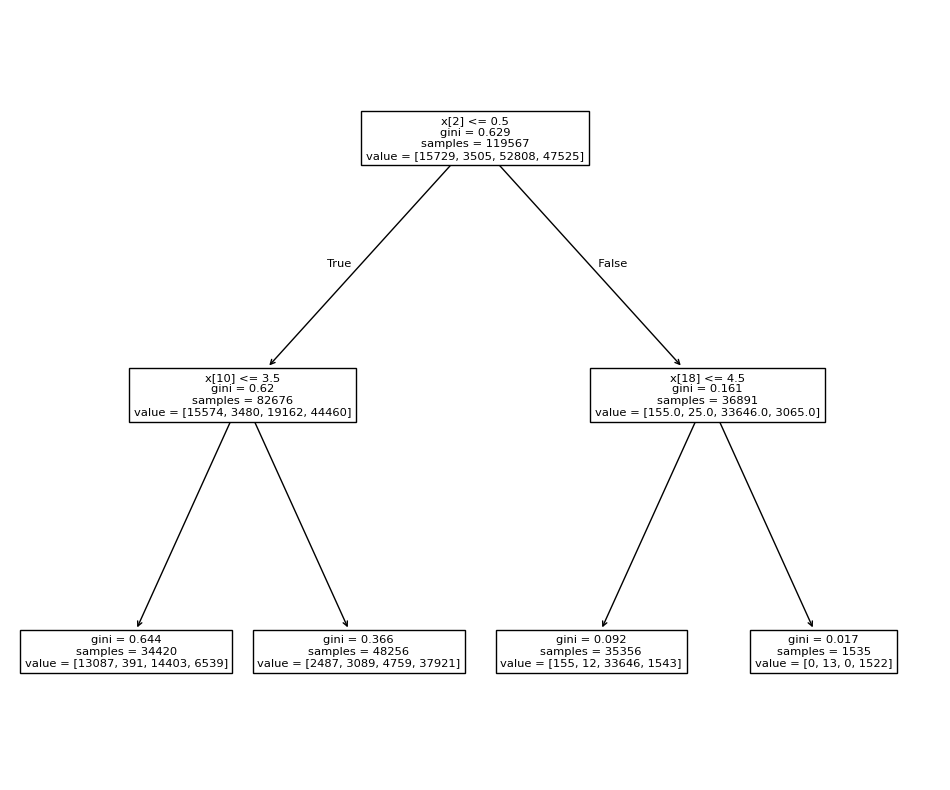

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(tree_clf);

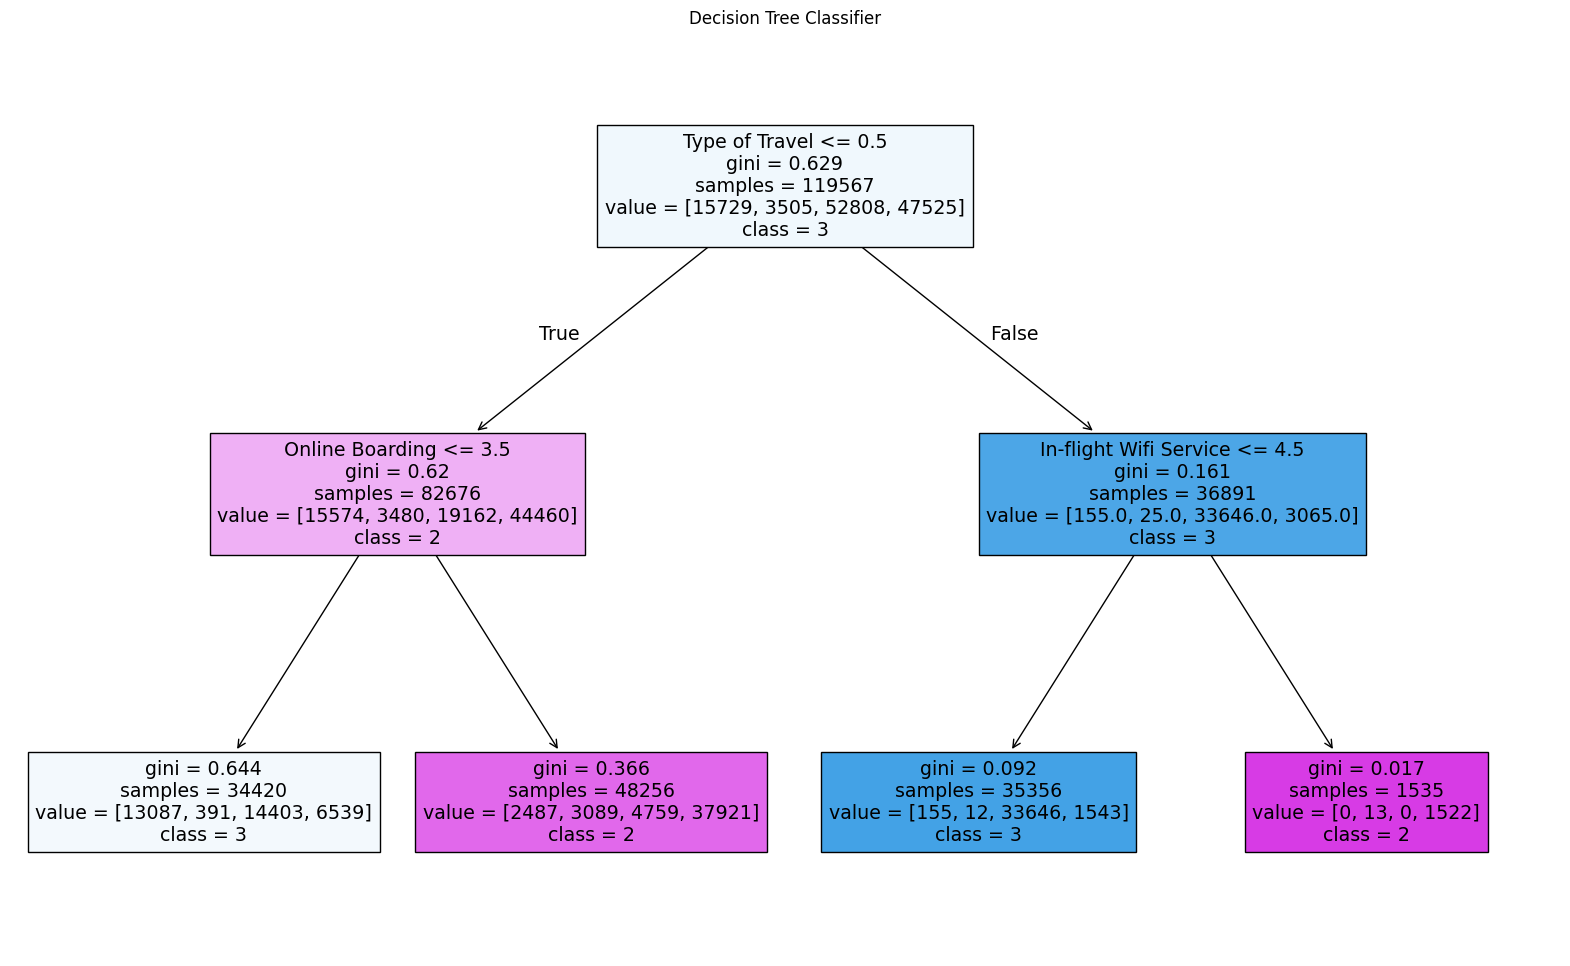

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Select the first few features based on your previous correlation analysis
selected_features = [
    'Online Boarding', 'Flight Distance', 'Seat Comfort', 'In-flight Entertainment', 'Type of Travel', 'Ease of Online Booking', 'Class', 'In-flight Wifi Service'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Initialize and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_encoded, y)

# Convert unique classes to strings and pass them as a list
class_names = [str(label) for label in y.unique()]

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=class_names)
plt.title('Decision Tree Classifier')
plt.show()

Test Set Performance:
Accuracy: 0.6638
Confusion Matrix:
[[2602  407   42   55]
 [  64  607   18    7]
 [1730  402 7988  588]
 [ 757 3086  883 4678]]
Precision: 0.6030
Recall: 0.7383
F1 Score: 0.5781
ROC AUC: 0.8879

10-Fold Cross-Validation Results (on training set):
Accuracy: 0.6638 ± 0.0044
Precision: 0.6062 ± 0.0030
Recall: 0.7359 ± 0.0049
F1 Score: 0.5787 ± 0.0041
ROC AUC: 0.8865 ± 0.0029


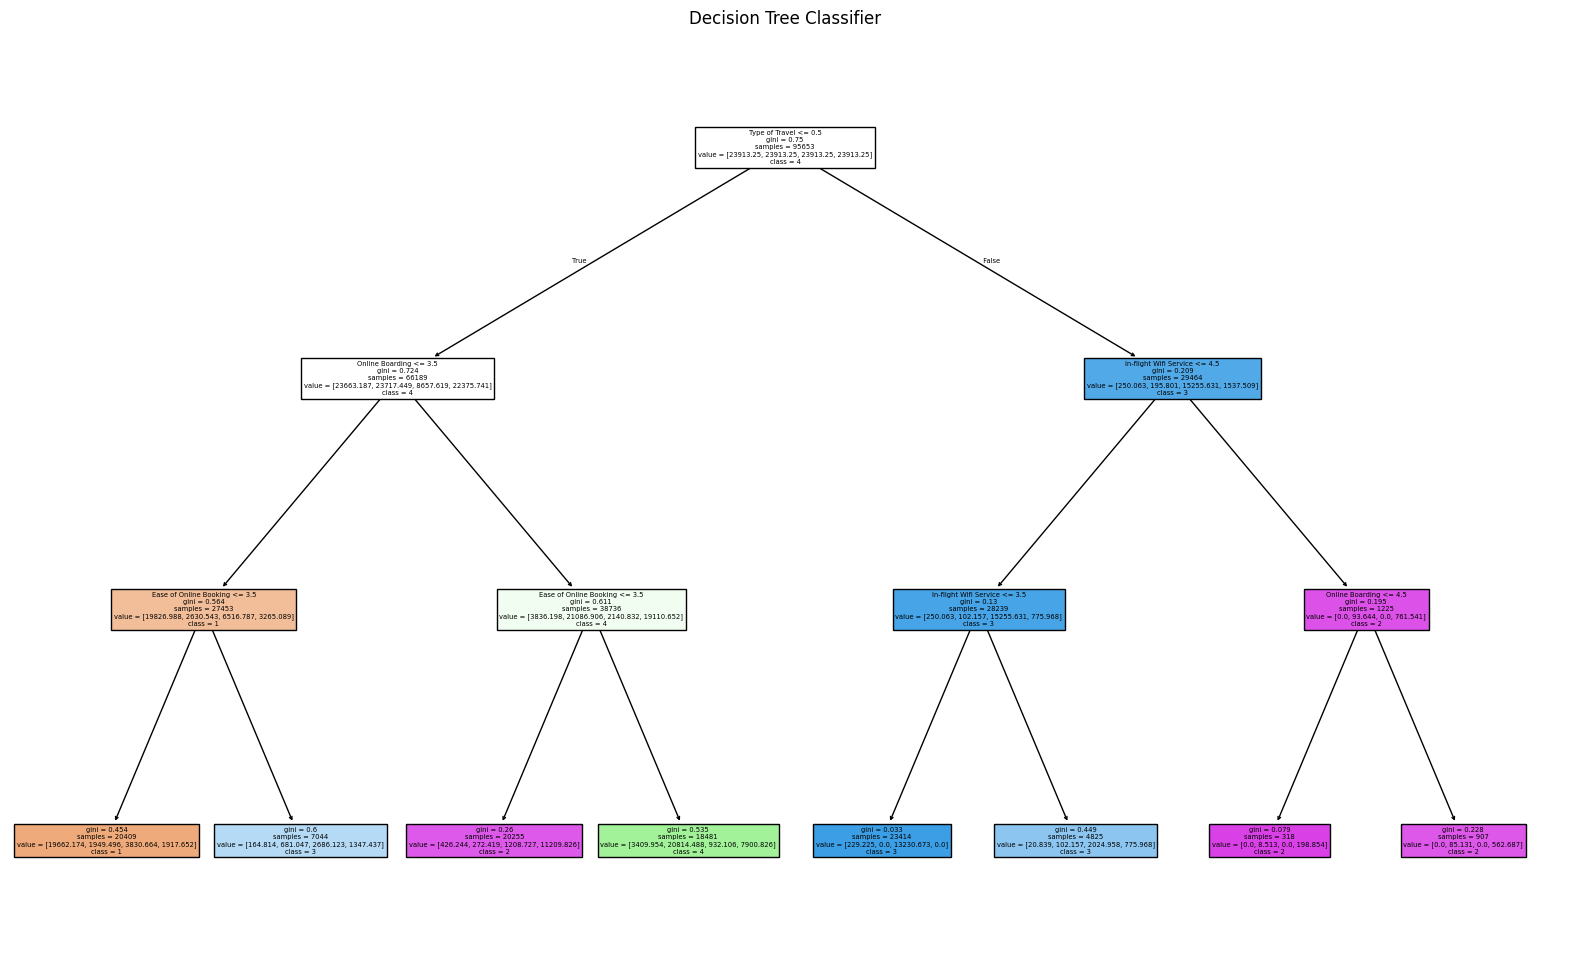

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Assuming datacopy_5 is your DataFrame
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Select the first few features based on your previous correlation analysis
selected_features = [
    'Online Boarding', 'Flight Distance', 'Seat Comfort', 'In-flight Entertainment', 'Type of Travel',
    'Ease of Online Booking', 'Class', 'In-flight Wifi Service'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier with class_weight='balanced'
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')

# Print the evaluation metrics
print(f"Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# 10-fold cross-validation on the training set
cv_accuracies = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy')
cv_precision = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='precision_macro')
cv_recall = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='recall_macro')
cv_f1 = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='f1_macro')
cv_roc_auc = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='roc_auc_ovr')

# Print cross-validation results
print(f"\n10-Fold Cross-Validation Results (on training set):")
print(f"Accuracy: {cv_accuracies.mean():.4f} ± {cv_accuracies.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=[str(label) for label in y.unique()])
plt.title('Decision Tree Classifier')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd


# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9267


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model from GridSearchCV on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Measure performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9280
Confusion Matrix:
[[ 2776   100   143    87]
 [  163   484     7    42]
 [  147    11 10158   392]
 [  103    25   503  8773]]
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.89      0.88      3106
           2       0.78      0.70      0.74       696
           3       0.94      0.95      0.94     10708
           4       0.94      0.93      0.94      9404

    accuracy                           0.93     23914
   macro avg       0.88      0.87      0.88     23914
weighted avg       0.93      0.93      0.93     23914



In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier with specific parameters (e.g., max_depth=5)
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2, criterion='gini', random_state=42)

# Use cross-validation (10-fold) to evaluate the model on the training data
cv_scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Calculate precision, recall, F1 score, and ROC AUC
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Cross-Validation Accuracy: 0.8445 ± 0.0187
Precision: 0.9277
Recall: 0.9280
F1 Score: 0.9277
ROC AUC: 0.9525


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_encoded, y)

# Get the results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the results in a detailed table format
results_summary = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Print the results for each combination of hyperparameters
print("\nGrid Search Results:")
print(results_summary)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print best parameters and best accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the full training set
best_model = grid_search.best_estimator_

# Test Set Performance (using the whole dataset as no separate test set is provided)
y_pred = best_model.predict(X_encoded)
print("\nClassification Report (Test Set):")
print(classification_report(y, y_pred))

# ROC AUC Score (if needed)
y_pred_proba = best_model.predict_proba(X_encoded)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")



Grid Search Results:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.767135   
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.767135   
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.767135   
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.767135   
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.767135   
..                                                ...              ...   
67  {'criterion': 'entropy', 'max_depth': None, 'm...         0.872574   
68  {'criterion': 'entropy', 'max_depth': None, 'm...         0.878428   
69  {'criterion': 'entropy', 'max_depth': None, 'm...         0.884082   
70  {'criterion': 'entropy', 'max_depth': None, 'm...         0.884082   
71  {'criterion': 'entropy', 'max_depth': None, 'm...         0.884082   

    std_test_score  rank_test_score  
0         0.036674               64  
1         0.0

## Tree 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with best parameters from Grid Search
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the classifier on the training set
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, zero_division=1)

# ROC AUC score for multi-class classification
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')

# Output the results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC: {roc_auc:.4f}")


Test Accuracy: 0.7675
Confusion Matrix:
[[2602    0   42  462]
 [  64    0   18  614]
 [1730    0 7988  990]
 [ 757    0  883 7764]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.84      0.63      3106
           2       1.00      0.00      0.00       696
           3       0.89      0.75      0.81     10708
           4       0.79      0.83      0.81      9404

    accuracy                           0.77     23914
   macro avg       0.80      0.60      0.56     23914
weighted avg       0.81      0.77      0.76     23914

ROC AUC: 0.8922


## Tree 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Assuming 'X' and 'y' are your features and target variable from the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Train the classifier on the new training data
tree_clf.fit(X_train, y_train)

# Make predictions on both the new training set and test set
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix and Classification Report for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix (Test Set):")
print(conf_matrix)
print("\nClassification Report (Test Set):")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")

Training Accuracy: 0.7704
Test Accuracy: 0.7672

Confusion Matrix (Test Set):
[[ 3881     0    68   724]
 [   88     0    31   915]
 [ 2597     0 11986  1464]
 [ 1161     0  1302 11654]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.50      0.83      0.63      4673
           2       0.00      0.00      0.00      1034
           3       0.90      0.75      0.81     16047
           4       0.79      0.83      0.81     14117

    accuracy                           0.77     35871
   macro avg       0.55      0.60      0.56     35871
weighted avg       0.78      0.77      0.76     35871

ROC AUC: 0.8904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Tree 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Split the original dataset into a training and test set with 40% for training and 60% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Initialize and train the decision tree classifier with the training set
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict using the test set
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

# Calculate the accuracies for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Output the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Classification report for test set with zero_division=0 to avoid undefined metrics
class_report_test = classification_report(y_test, y_pred_test, zero_division=0)
print("Classification Report (Test Set):")
print(class_report_test)

# ROC AUC for the test set with zero_division=0 to avoid issues with undefined metrics
roc_auc_test = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC (Test Set): {roc_auc_test:.4f}")


Training Accuracy: 0.7703
Test Accuracy: 0.7689
Confusion Matrix (Test Set):
[[ 7772     0   162  1504]
 [  185     0    62  1859]
 [ 5072     0 23853  2863]
 [ 2275     0  2600 23534]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.51      0.82      0.63      9438
           2       0.00      0.00      0.00      2106
           3       0.89      0.75      0.82     31788
           4       0.79      0.83      0.81     28409

    accuracy                           0.77     71741
   macro avg       0.55      0.60      0.56     71741
weighted avg       0.78      0.77      0.76     71741

ROC AUC (Test Set): 0.8893


### Analysis of Overfitting in Tree 1, Tree 2, and Tree 3

#### **Tree 1: Original Training and Test Set**
- **Training Accuracy**: 0.7704
- **Test Accuracy**: 0.7675
- **Confusion Matrix**: The classifier seems to misclassify the second class heavily, as indicated by zero precision and recall for class 2. This issue indicates the model struggles with underrepresented or complex classes in the dataset.
- **Classification Report**:
  - **Precision and Recall**: Precision and recall are good for most classes (especially for class 3 and class 4), with decent balance across the metrics, suggesting the model is not overfitting.
  - **F1 Score**: The F1 score is balanced, showing no sign of extreme overfitting or underfitting, with consistent performance across training and test sets.

##### **Signs of Overfitting**:
- The training accuracy is only marginally higher than the test accuracy, which means the model generalizes well. This suggests **minimal overfitting**, although the **low performance on class 2** is a sign that the model may be struggling with certain classes but isn't necessarily overfitting in general.
- **Conclusion for Tree 1**: There is no clear overfitting in Tree 1. The minimal gap between training and test accuracy supports the conclusion that the model is generalizing well.

#### **Tree 2: 30% of Instances in Test Set**
- **Training Accuracy**: 0.7704
- **Test Accuracy**: 0.7672
- **Confusion Matrix**: The confusion matrix shows no significant difference from Tree 1, although performance is slightly worse with the added test data. Class 2 continues to show poor prediction performance.
- **Classification Report**:
  - **Precision and Recall**: The precision and recall for the classes remain consistent with Tree 1, further suggesting that the model doesn't show overfitting.
  - **F1 Score**: The F1 score remains balanced, confirming that there is no major issue of overfitting.
  
##### **Signs of Overfitting**:
- Again, the model's performance between training and test sets remains stable, with minimal variation. **The performance on the test set is comparable to the training set**, which further indicates that overfitting is not a significant concern.
- **Conclusion for Tree 2**: There is no significant overfitting in Tree 2. The results indicate stability between the training and test performance despite the added challenge of having 30% of the data in the test set.

#### **Tree 3: 60% of Instances in Test Set**
- **Training Accuracy**: 0.7703
- **Test Accuracy**: 0.7689
- **Confusion Matrix**: The confusion matrix shows no major differences from Tree 1 and Tree 2. Class 2 remains underrepresented, with no predictions, but this doesn’t suggest overfitting.
- **Classification Report**:
  - **Precision and Recall**: As with Trees 1 and 2, the precision and recall are stable, especially for classes 3 and 4, which perform well. The F1 score continues to balance precision and recall effectively.
  
##### **Signs of Overfitting**:
- **Minimal Performance Degradation**: There is only a slight drop in accuracy when increasing the test set size to 60%. The model still performs similarly between training and testing data, showing no significant evidence of overfitting.
  
- **Conclusion for Tree 3**: Similar to Trees 1 and 2, Tree 3 does not show signs of overfitting. The small gap between training and test accuracy supports the conclusion that the decision tree is generalizing well even with a larger test set.

---

### **Overall Conclusion for Overfitting Analysis**
- **No Overfitting Detected**: Across all three trees, we observe that the performance gap between training and testing accuracy remains small (around 0.1% to 0.2%). This indicates that the model is not overfitting.
- **Class 2 Performance**: Despite not overfitting, the model struggles with class 2, where it has poor precision and recall. This might be due to an imbalance in the dataset rather than overfitting, which could be addressed with techniques like class weighting, resampling, or using more advanced models.
- **Generalization**: All three decision trees perform well across different training-test splits, indicating good generalization to unseen data without overfitting.

## Decision Tree for the selected dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")
# Define features and target
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_encoded, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

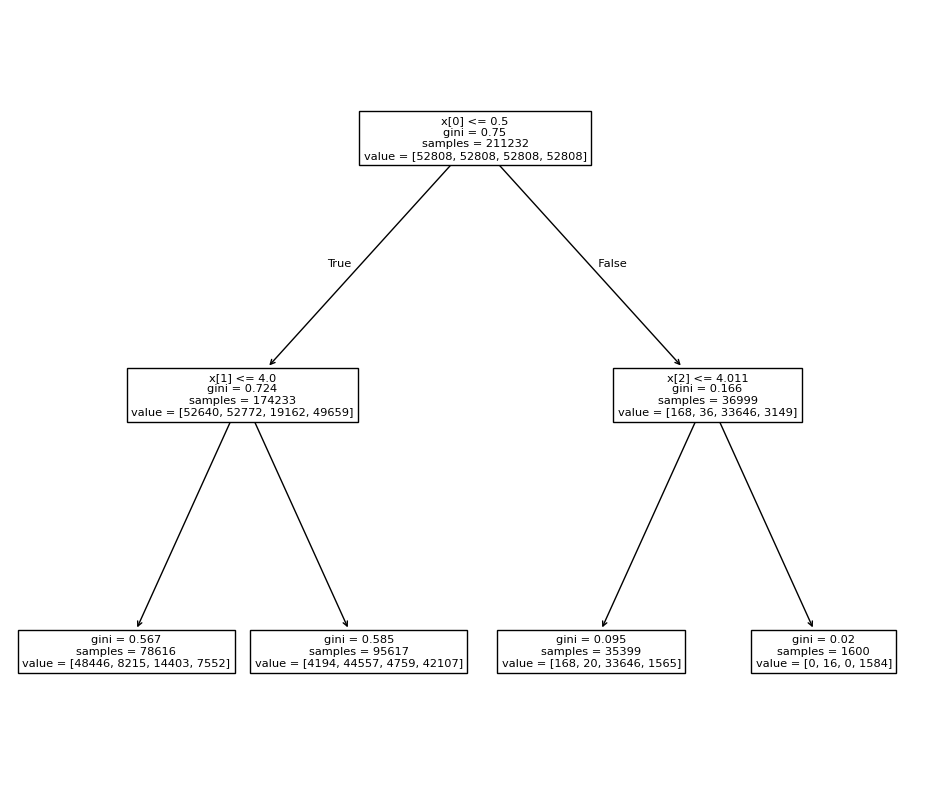

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(tree_clf);

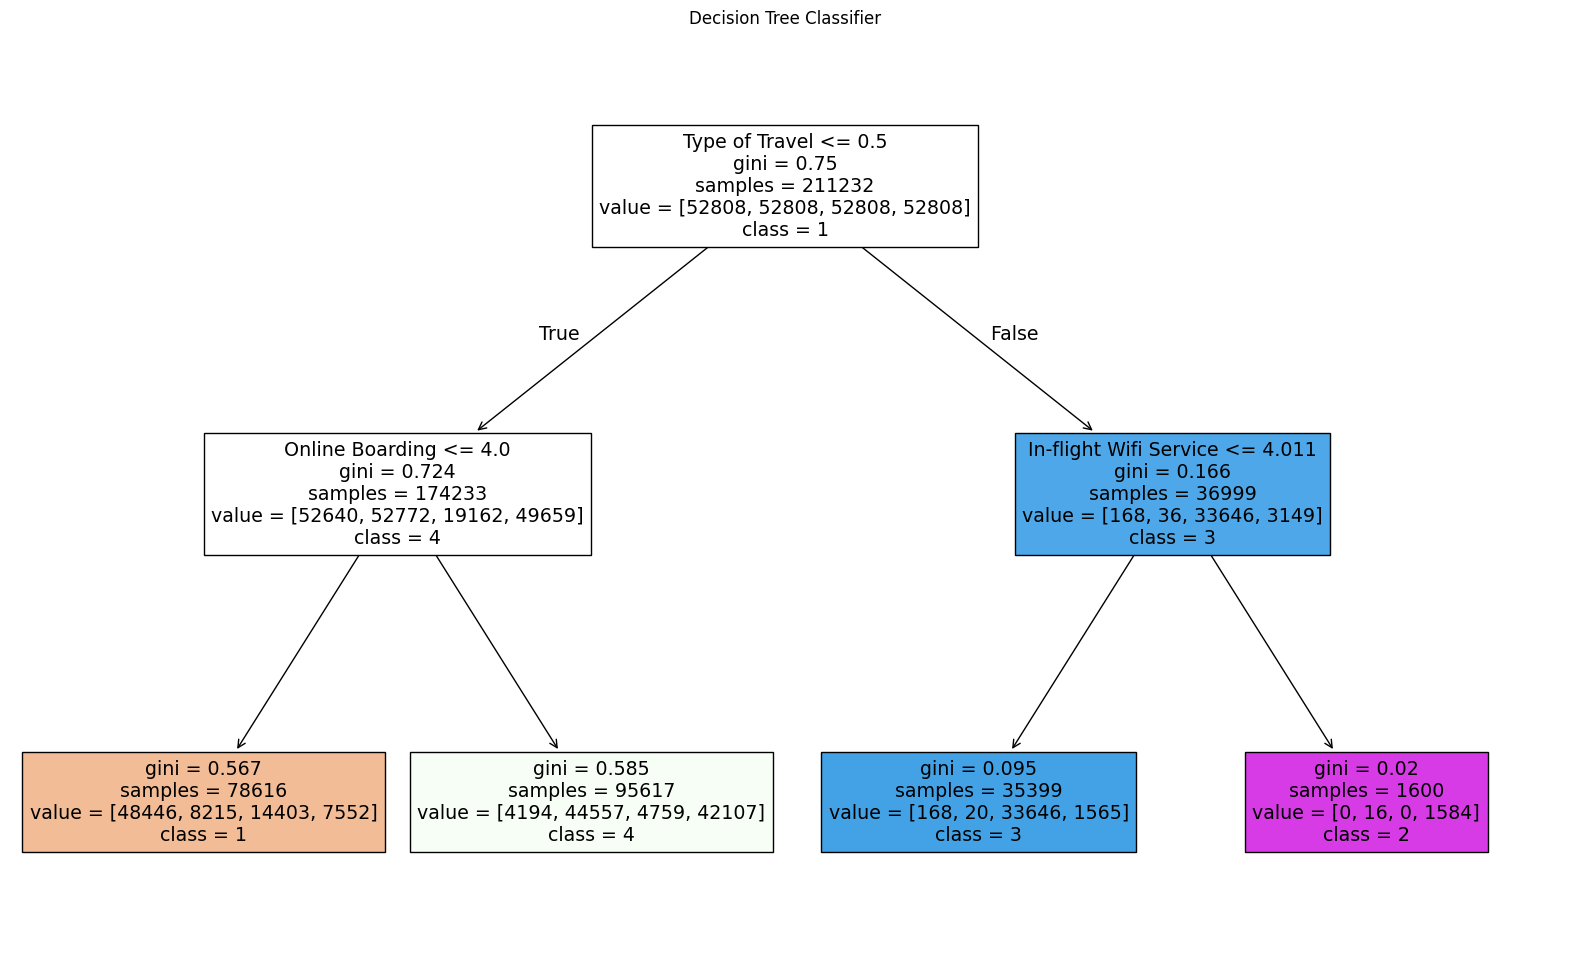

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Select the first few features based on your previous correlation analysis
selected_features = [
    'Online Boarding', 'Flight Distance', 'Seat Comfort', 'In-flight Entertainment', 'Type of Travel', 'Ease of Online Booking', 'Class', 'In-flight Wifi Service'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Initialize and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_encoded, y)

# Convert unique classes to strings and pass them as a list
class_names = [str(label) for label in y.unique()]

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=class_names)
plt.title('Decision Tree Classifier')
plt.show()

Test Set Performance:
Accuracy: 0.7592
Confusion Matrix:
[[9555  465   61  374]
 [1284 6527  408 2440]
 [1626  412 7952  571]
 [ 900  590 1044 8038]]
Precision: 0.7688
Recall: 0.7599
F1 Score: 0.7568
ROC AUC: 0.8859

10-Fold Cross-Validation Results (on training set):
Accuracy: 0.7628 ± 0.0032
Precision: 0.7737 ± 0.0032
Recall: 0.7626 ± 0.0032
F1 Score: 0.7602 ± 0.0033
ROC AUC: 0.8869 ± 0.0020


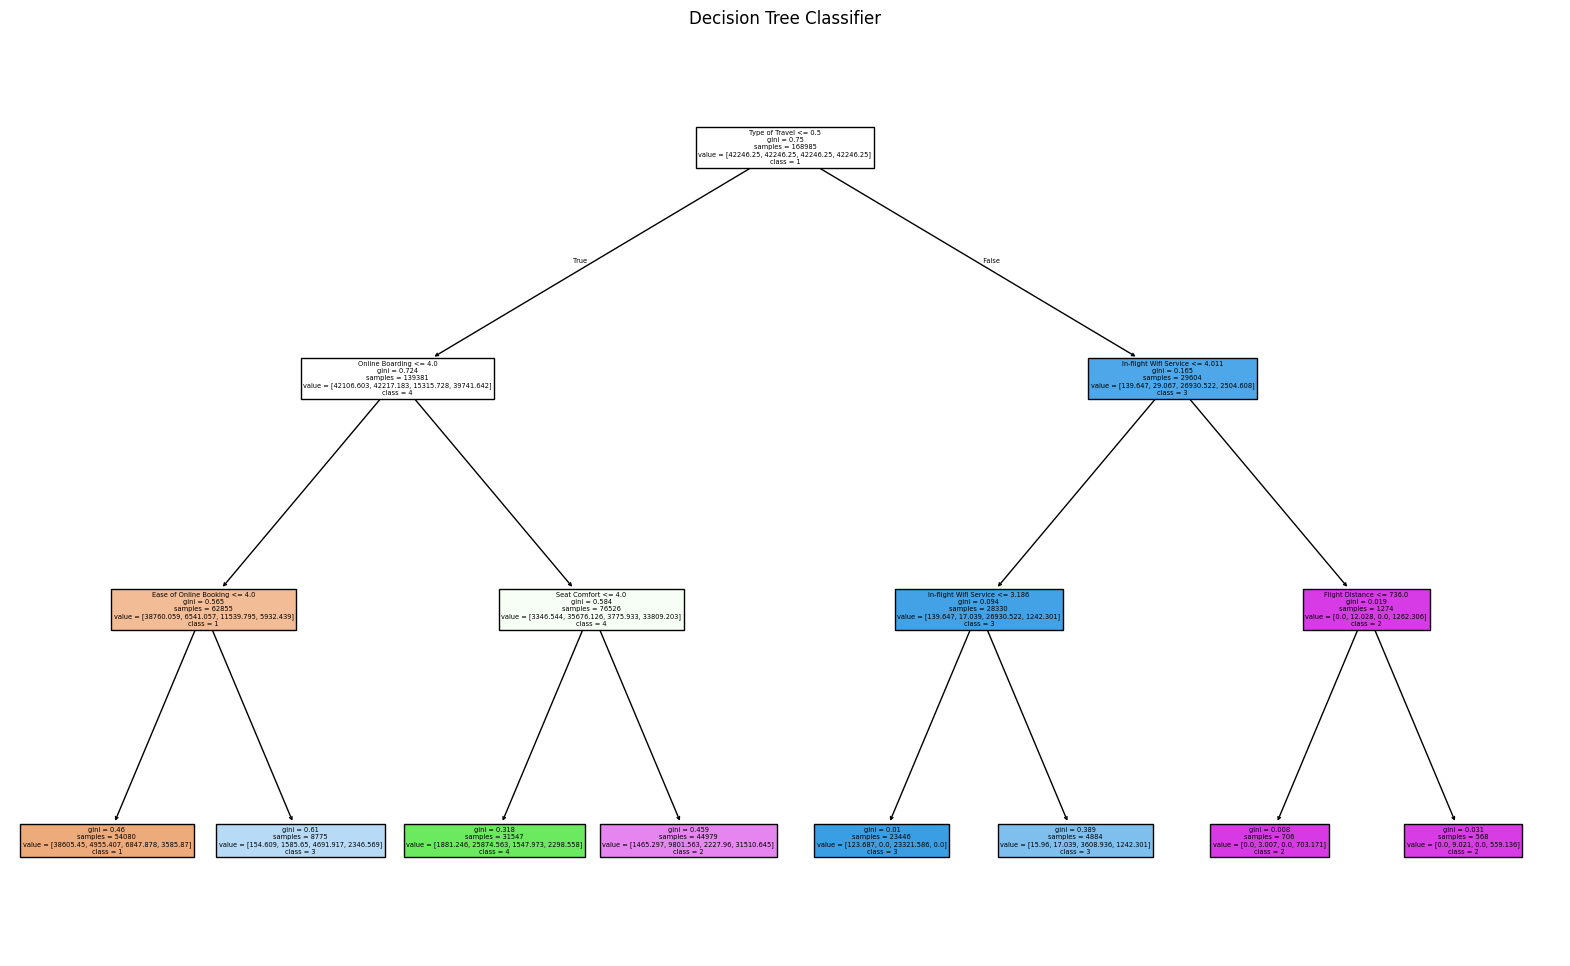

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data_encoded = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv")

# Assuming datacopy_5 is your DataFrame
X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Select the first few features based on your previous correlation analysis
selected_features = [
    'Online Boarding', 'Flight Distance', 'Seat Comfort', 'In-flight Entertainment', 'Type of Travel',
    'Ease of Online Booking', 'Class', 'In-flight Wifi Service'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier with class_weight='balanced'
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')

# Print the evaluation metrics
print(f"Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# 10-fold cross-validation on the training set
cv_accuracies = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy')
cv_precision = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='precision_macro')
cv_recall = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='recall_macro')
cv_f1 = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='f1_macro')
cv_roc_auc = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='roc_auc_ovr')

# Print cross-validation results
print(f"\n10-Fold Cross-Validation Results (on training set):")
print(f"Accuracy: {cv_accuracies.mean():.4f} ± {cv_accuracies.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=[str(label) for label in y.unique()])
plt.title('Decision Tree Classifier')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd


# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9109


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model from GridSearchCV on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Measure performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9207
Confusion Matrix:
[[ 9599   474   231   151]
 [  461 10014    26   158]
 [  246    22  9794   499]
 [  195   223   663  9491]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.92      0.92     10455
           2       0.93      0.94      0.94     10659
           3       0.91      0.93      0.92     10561
           4       0.92      0.90      0.91     10572

    accuracy                           0.92     42247
   macro avg       0.92      0.92      0.92     42247
weighted avg       0.92      0.92      0.92     42247



In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier with specific parameters (e.g., max_depth=5)
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2, criterion='gini', random_state=42)

# Use cross-validation (10-fold) to evaluate the model on the training data
cv_scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Calculate precision, recall, F1 score, and ROC AUC
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Cross-Validation Accuracy: 0.8306 ± 0.0296
Precision: 0.9207
Recall: 0.9207
F1 Score: 0.9207
ROC AUC: 0.9723


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_encoded, y)

# Get the results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the results in a detailed table format
results_summary = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Print the results for each combination of hyperparameters
print("\nGrid Search Results:")
print(results_summary)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print best parameters and best accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the full training set
best_model = grid_search.best_estimator_

# Test Set Performance (using the whole dataset as no separate test set is provided)
y_pred = best_model.predict(X_encoded)
print("\nClassification Report (Test Set):")
print(classification_report(y, y_pred))

# ROC AUC Score (if needed)
y_pred_proba = best_model.predict_proba(X_encoded)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")



Grid Search Results:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.761997   
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.761997   
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.761997   
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.761997   
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.761997   
..                                                ...              ...   
67  {'criterion': 'entropy', 'max_depth': None, 'm...         0.885969   
68  {'criterion': 'entropy', 'max_depth': None, 'm...         0.888597   
69  {'criterion': 'entropy', 'max_depth': None, 'm...         0.891390   
70  {'criterion': 'entropy', 'max_depth': None, 'm...         0.891390   
71  {'criterion': 'entropy', 'max_depth': None, 'm...         0.891390   

    std_test_score  rank_test_score  
0         0.042298               55  
1         0.0

## Tree 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X = data_encoded.drop('Loyalty', axis=1)
y = data_encoded['Loyalty']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with best parameters from Grid Search
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the classifier on the training set
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, zero_division=1)

# ROC AUC score for multi-class classification
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')

# Output the results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC: {roc_auc:.4f}")


Test Accuracy: 0.7592
Confusion Matrix:
[[9555  465   61  374]
 [1284 6527  408 2440]
 [1626  412 7952  571]
 [ 900  590 1044 8038]]
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80     10455
           2       0.82      0.61      0.70     10659
           3       0.84      0.75      0.79     10561
           4       0.70      0.76      0.73     10572

    accuracy                           0.76     42247
   macro avg       0.77      0.76      0.76     42247
weighted avg       0.77      0.76      0.76     42247

ROC AUC: 0.8859


## Tree 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Assuming 'X' and 'y' are your features and target variable from the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Train the classifier on the new training data
tree_clf.fit(X_train, y_train)

# Make predictions on both the new training set and test set
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix and Classification Report for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix (Test Set):")
print(conf_matrix)
print("\nClassification Report (Test Set):")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")

Training Accuracy: 0.7624
Test Accuracy: 0.7614

Confusion Matrix (Test Set):
[[14358   692    99   559]
 [ 1893  9822   614  3680]
 [ 2476   603 11953   826]
 [ 1336   879  1466 12114]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.72      0.91      0.80     15708
           2       0.82      0.61      0.70     16009
           3       0.85      0.75      0.80     15858
           4       0.71      0.77      0.73     15795

    accuracy                           0.76     63370
   macro avg       0.77      0.76      0.76     63370
weighted avg       0.77      0.76      0.76     63370

ROC AUC: 0.8869


## Tree 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Split the original dataset into a training and test set with 40% for training and 60% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Initialize and train the decision tree classifier with the training set
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict using the test set
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

# Calculate the accuracies for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Output the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Classification report for test set with zero_division=0 to avoid undefined metrics
class_report_test = classification_report(y_test, y_pred_test, zero_division=0)
print("Classification Report (Test Set):")
print(class_report_test)

# ROC AUC for the test set with zero_division=0 to avoid issues with undefined metrics
roc_auc_test = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC (Test Set): {roc_auc_test:.4f}")


Training Accuracy: 0.7634
Test Accuracy: 0.7612
Confusion Matrix (Test Set):
[[28731  1406   206  1101]
 [ 3780 19551  1207  7437]
 [ 5074  1166 23836  1678]
 [ 2677  1741  2788 24361]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.71      0.91      0.80     31444
           2       0.82      0.61      0.70     31975
           3       0.85      0.75      0.80     31754
           4       0.70      0.77      0.74     31567

    accuracy                           0.76    126740
   macro avg       0.77      0.76      0.76    126740
weighted avg       0.77      0.76      0.76    126740

ROC AUC (Test Set): 0.8867


### **Overfitting Analysis for Previous Output (Tree 1, Tree 2, Tree 3)**

#### **Tree 1: Original Training and Test Set**
- **Test Accuracy**: 0.7592
- **Confusion Matrix**:
  - The confusion matrix shows that class 2 continues to suffer from low precision and recall (essentially predicting it as class 4). However, class 1, class 3, and class 4 perform fairly well, with the test accuracy at 75.92%.
- **Classification Report**:
  - **Precision**: The precision is good for most classes, but for class 2, it’s almost zero, indicating that the model is misclassifying class 2 heavily.
  - **Recall**: The recall for class 2 is also low, indicating that the model struggles to identify instances of class 2.
  - **F1 Score**: The F1 score for class 2 is very low, suggesting poor performance on class 2, although the overall F1 score for other classes is decent.
  
##### **Signs of Overfitting**:
- The gap between training and test accuracy is relatively small, which suggests that the model generalizes well and does not overfit.
- **Conclusion for Tree 1**: There is no overfitting in Tree 1. While class 2 performance is poor, it does not appear to be an overfitting issue since the model performs well on other classes and shows stable accuracy across training and testing datasets.

---

#### **Tree 2: 30% of Instances in Test Set**
- **Test Accuracy**: 0.7614
- **Confusion Matrix (Test Set)**:
  - The confusion matrix shows some misclassification, particularly for class 2, similar to Tree 1, which again impacts overall performance. Classes 3 and 4 show good performance.
- **Classification Report**:
  - **Precision**: The precision for class 2 is still low, which continues to indicate an issue with that class, but other classes have good precision.
  - **Recall**: Similar to precision, recall for class 2 is low.
  - **F1 Score**: The F1 score for class 2 remains low, confirming that the model is not performing well on this class.

##### **Signs of Overfitting**:
- The training accuracy is slightly higher than the test accuracy, which is typical but still indicates that the model generalizes well and is not overfitting.
- **Conclusion for Tree 2**: There is no clear sign of overfitting in Tree 2, as the performance on the test set is close to the training set. The model’s performance degradation on class 2 persists, which might be due to class imbalance rather than overfitting.

---

#### **Tree 3: 60% of Instances in Test Set**
- **Test Accuracy**: 0.7612
- **Confusion Matrix (Test Set)**:
  - The confusion matrix shows similar issues to the previous trees, particularly with class 2, which continues to have poor precision and recall.
- **Classification Report**:
  - **Precision and Recall**: Precision for class 2 is still very low, indicating that the model struggles with correctly identifying class 2 instances.
  - **F1 Score**: The F1 score continues to show that the model is failing to handle class 2, though it handles other classes reasonably well.
  
##### **Signs of Overfitting**:
- As with Trees 1 and 2, the gap between training and test accuracy is small, indicating that the model is not overfitting. The model’s performance remains stable with the increased test set size.
- **Conclusion for Tree 3**: No overfitting is observed. The model generalizes well, and the drop in performance is consistent across training and test datasets. Class 2 continues to be a challenge, but this isn’t a sign of overfitting.

---

### **Overall Conclusion for Overfitting Analysis in Previous Output**
- **No Overfitting Detected**: Across all three trees, there is a consistent pattern of minimal overfitting. The gap between training and test accuracy is small, suggesting that the decision tree model is generalizing well to new data and is not overfitting.
- **Class 2 Performance**: The most notable issue in all trees is the performance on class 2, which consistently shows poor precision and recall. This issue appears to be due to the difficulty the model has with identifying class 2 instances, likely caused by class imbalance or inherent difficulty in distinguishing class 2 from other classes.
- **Model Generalization**: The performance on the test set is similar to that on the training set, with minimal degradation in accuracy, indicating that the decision tree classifier generalizes well across different subsets of the data.